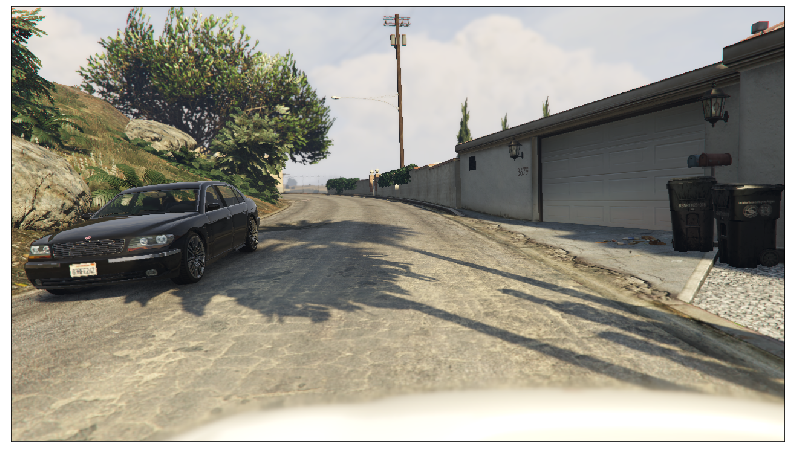

In [34]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:80%!important;width:auto!important;}</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

from tqdm.notebook import tqdm, trange

import sys
sys.path.append('../')

from depth_Functions import (
    show_img,
    show_array_of_images,
    show_function,
    import_raw_colour_image
)

from Feature_Extraction import (
    create_local_feature_vector,
    titles
)

bgr = import_raw_colour_image('../GTA_images/Simple/Colour/color_1.raw')
show_img(bgr);

from Feature_array import Feature_array

# Creating an array of features

In [2]:
show_function(Feature_array.__init__)

def __init__(self, image, local_function, global_function=None, patchshapes=[], blur=True, convert=None, dtype = np.float64, *args, **kwargs):
        if convert is None:
            self.image = image
        else :
            self.image = cv2.cvtColor(image, convert)
        if blur:
            image = cv2.GaussianBlur(image, (5, 5), 0)
        
        self.local_function = local_function
        self.local_features = local_function(image)
        self.shape = self.local_features.shape
        self.patchshapes = patchshapes
        self.global_function = global_function
        self.global_features = None

In [21]:
features = Feature_array(image=bgr, local_function=create_local_feature_vector,convert=cv2.COLOR_BGR2YCrCb)

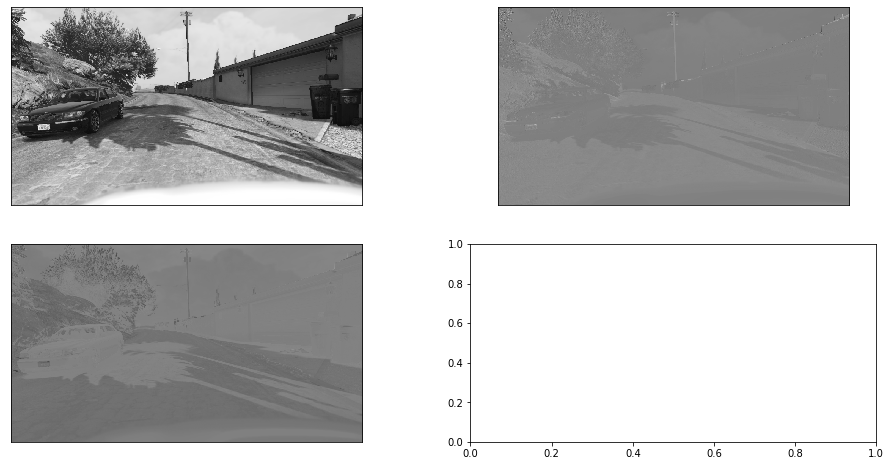

In [22]:
show_array_of_images([features.image], split_channels=True, figsize=(8,16))

In [24]:
features.local_features.shape

(720, 1280, 34)

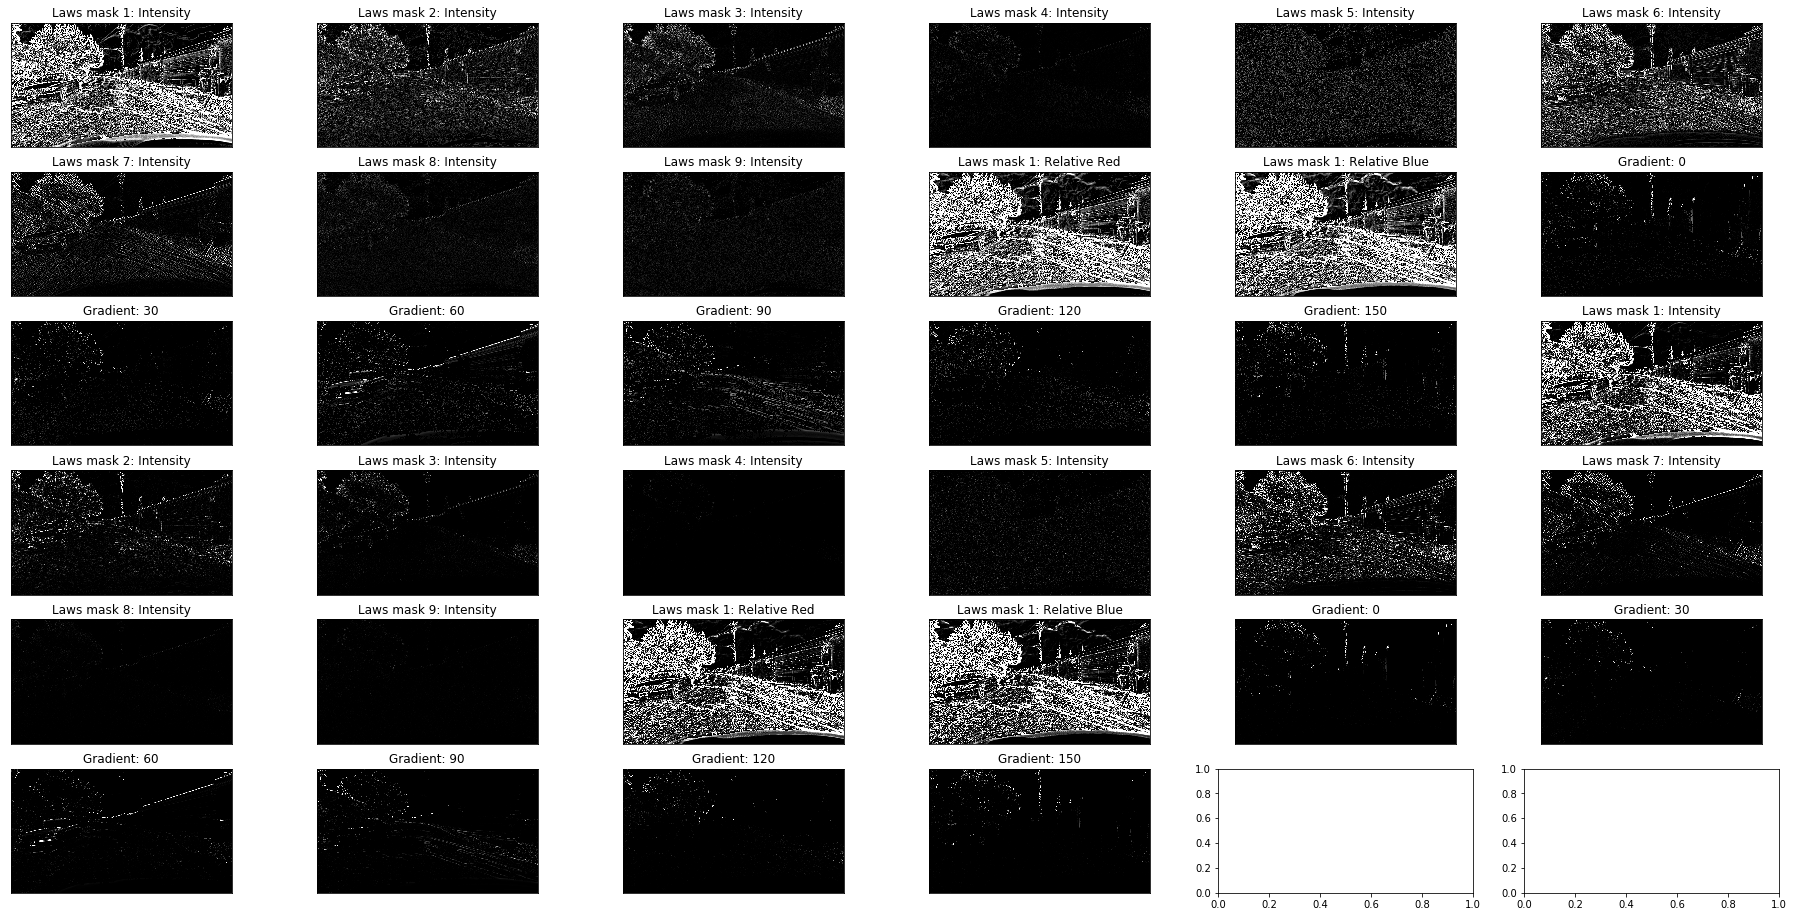

In [35]:
features.show_local_features(titles=2*titles)